### Problem Statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Data Summary:
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

### Importing Data

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir_train = pathlib.Path("C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/")
data_dir_test = pathlib.Path("C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Test/")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

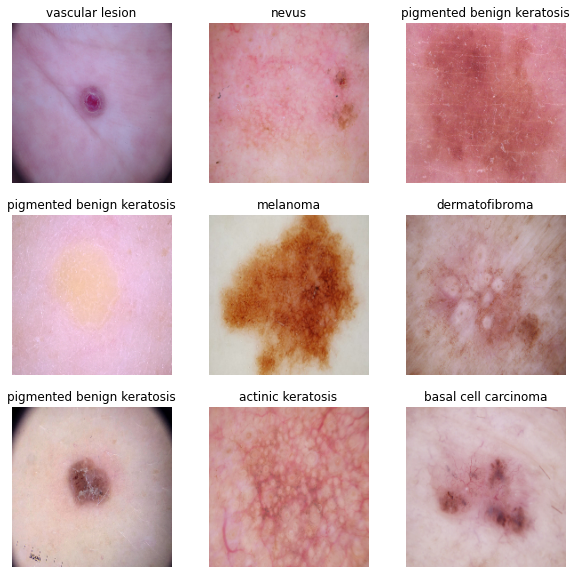

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [10]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))]

In [11]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model

In [12]:
from tensorflow.keras.optimizers import RMSprop

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [15]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\Manoj\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 374s 6s/step - loss: 2.0700 - accuracy: 0.1942 - val_loss: 2.0324 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 348s 6s/step - loss: 2.0237 - accuracy: 0.2031 - val_loss: 2.0108 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 345s 6s/step - loss: 1.9877 - accuracy: 0.2221 - val_loss: 1.9611 - val_accuracy: 0.2349
Epoch 4/20
56/56 [==============================] - 347s 6s/step - loss: 1.9615 - accuracy: 0.2573 - val_loss: 1.9361 - val_accuracy: 0.3199
Epoch 5/20
56/56 [==============================] - 366s 7s/step - loss: 1.9767 - accuracy: 0.2416 - val_loss: 1.9820 - val_accuracy: 0.2371
Epoch 6/20
56/56 [==============================] - 348s 6s/step - loss: 1.9594 - accuracy: 0.2628 - val_loss: 1.9539 - val_accuracy: 0.2327
Epoch 7/20
56/56 [==============================] - 347s 6s/step - loss: 1.9458 - accuracy: 0.2706 - val_loss: 1.9458 - val_accuracy: 0.2685
Epoch 8/20
56/56 [======

### Visualizing training results

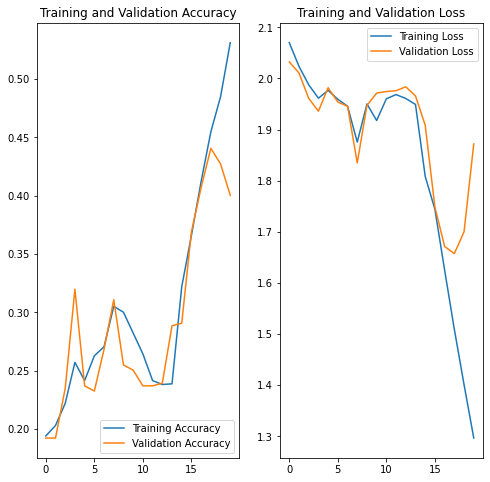

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



Findings on the first base model
- Initial findings: The model is overfitting because overfitting is calculated w.r.t loss, and we can also see difference in loss functions in training & validation around the 19-20th epoch
- The accuracy is not good because there are enough features to remember the pattern, and the neural network is very young (just 20 epochs), so the learning has just started

### Model by adding augmentor layer and Dropouts

In [17]:
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

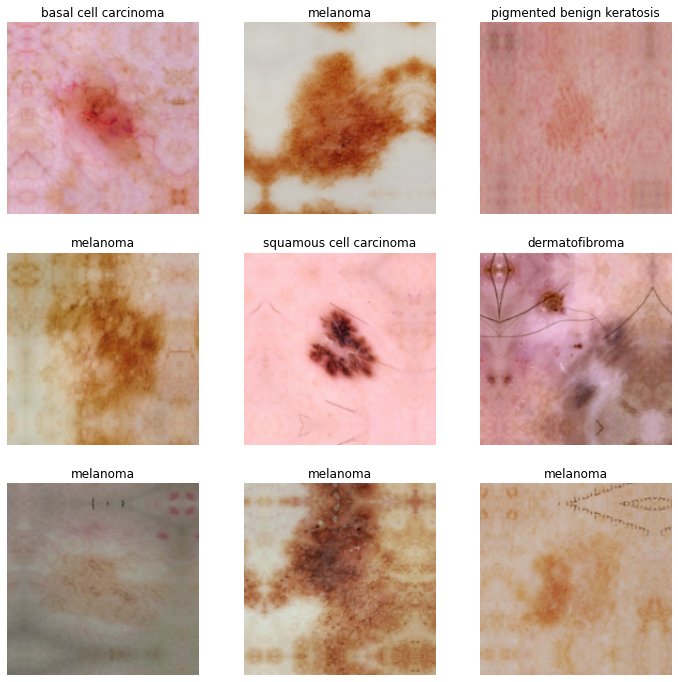

In [18]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Create the model 

In [19]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

num_classes = 9
model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))
model.add(Dropout(0.5))

### Compile the model

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                  

### Train the model

In [22]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 400s 7s/step - loss: 2.1593 - accuracy: 0.2104 - val_loss: 2.2213 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 387s 7s/step - loss: 2.1949 - accuracy: 0.2020 - val_loss: 2.2814 - val_accuracy: 0.0895
Epoch 3/20
56/56 [==============================] - 402s 7s/step - loss: 2.1924 - accuracy: 0.1948 - val_loss: 2.2057 - val_accuracy: 0.1655
Epoch 4/20
56/56 [==============================] - 404s 7s/step - loss: 2.1624 - accuracy: 0.2015 - val_loss: 2.2432 - val_accuracy: 0.1230
Epoch 5/20
56/56 [==============================] - 401s 7s/step - loss: 2.2154 - accuracy: 0.1646 - val_loss: 2.1095 - val_accuracy: 0.2595
Epoch 6/20
56/56 [==============================] - 402s 7s/step - loss: 2.2089 - accuracy: 0.1613 - val_loss: 2.1661 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 434s 8s/step - loss: 2.2009 - accuracy: 0.1680 - val_loss: 2.1949 - val_accuracy: 0.1767
Epoch 8/20
56

### Visualizing training results

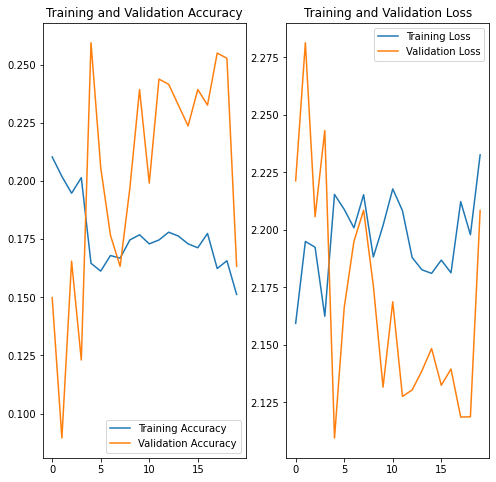

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings on the second  model
- Initial findings: The model is underfitting, as accuracy is very low for train and validation dataset
- Due to less amount of data, model is uderfit.

### Create the model by using augmentor

To handle classimbalance we are using AUgmentor for balancing

In [36]:
!pip install Augmentor


In [37]:
import Augmentor

path_to_training_dataset="C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E8D00D5E0>: 100%|██████████| 500/500 [00:20<00:00, 24.17 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E8D0EB2B0>: 100%|██████████| 500/500 [00:20<00:00, 24.68 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20EA8E6C190>: 100%|██████████| 500/500 [00:23<00:00, 21.39 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20E803135B0>: 100%|██████████| 500/500 [01:31<00:00,  5.44 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20E8EC5B640>: 100%|██████████| 500/500 [01:17<00:00,  6.48 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20EBF7BBAF0>: 100%|██████████| 500/500 [00:22<00:00, 21.92 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x20E8E3CD400>: 100%|██████████| 500/500 [00:48<00:00, 10.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E8EC555B0>: 100%|██████████| 500/500 [00:22<00:00, 21.91 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20E855B35E0>: 100%|██████████| 500/500 [00:22<00:00, 21.96 Samples/s]                  


In [38]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [39]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\Manoj\\Desktop\\Data_Science_ML\\CNN\\CNN\\Skin_Cancer_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6903a435-083e-4e4f-a763-5c1159f238ce.jpg',
 'C:\\Users\\Manoj\\Desktop\\Data_Science_ML\\CNN\\CNN\\Skin_Cancer_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_01fa6699-de1c-4b3e-8abc-269eed8b7202.jpg',
 'C:\\Users\\Manoj\\Desktop\\Data_Science_ML\\CNN\\CNN\\Skin_Cancer_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_3a0747f2-e0f3-4ff7-842f-ce8a6fb546e1.jpg',
 'C:\\Users\\Manoj\\Desktop\\Data_Science_ML\\CNN\\CNN\\Skin_Cancer_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_18341fce-37e3-417b-8986-dffee5ada093.jpg',
 'C:\\Users\\Manoj\\Desktop\\Data_Science_ML\\CNN\\CNN\\Skin_Cancer_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_42f5c361-fff9-43a0-a8d0-3be61ac757a4.jpg',
 'C:\\User

In [62]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [64]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [63]:
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [67]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [68]:
df2.shape

(4500, 2)

In [69]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

### Create the model on the data created by Augmentor

In [70]:
batch_size = 32
img_height = 180
img_width = 180

#### Create Training Dataset

In [71]:
data_dir_train="C:/Users/Manoj/Desktop/Data_Science_ML/CNN/CNN/Skin_Cancer_Dataset/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create Validation Dataset

In [72]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create the model

In [73]:
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])   


model.add(Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) 
model.add(Dense(9, activation='softmax'))


### Compile the model

In [74]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

### Train the model

In [76]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


C:\Users\Manoj\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 334s 2s/step - loss: 2.3698 - accuracy: 0.2739 - val_loss: 1.6421 - val_accuracy: 0.3972
Epoch 2/30
169/169 [==============================] - 331s 2s/step - loss: 1.5181 - accuracy: 0.4386 - val_loss: 1.5316 - val_accuracy: 0.4217
Epoch 3/30
169/169 [==============================] - 296s 2s/step - loss: 1.3495 - accuracy: 0.4970 - val_loss: 1.2225 - val_accuracy: 0.5620
Epoch 4/30
169/169 [==============================] - 293s 2s/step - loss: 1.2219 - accuracy: 0.5440 - val_loss: 1.1235 - val_accuracy: 0.5835
Epoch 5/30
169/169 [==============================] - 293s 2s/step - loss: 1.0681 - accuracy: 0.6024 - val_loss: 1.2763 - val_accuracy: 0.5323
Epoch 6/30
169/169 [==============================] - 293s 2s/step - loss: 1.0086 - accuracy: 0.6272 - val_loss: 1.0744 - val_accuracy: 0.5947
Epoch 7/30
169/169 [==============================] - 291s 2s/step - loss: 0.8699 - accuracy: 0.6780 - val_loss: 0.9316 - val_accuracy: 0.6615
Epoch 8/30

### Visualize the model

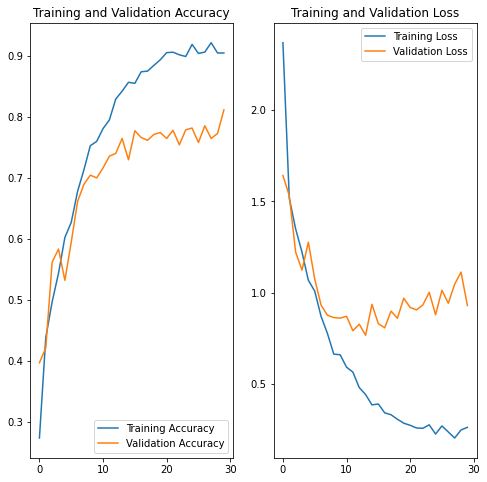

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- From above analysis we get descent accuracy for train and validation dataset
- The class rebalance helped in reducing overfititng of the data and thus the loss is being reduced 
- At last we tried Dropout and Augumentation which really helped in carry forward

<Figure size 720x720 with 0 Axes>

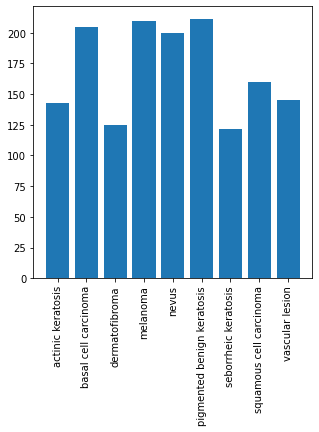

In [82]:
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()), rotation=90)
plt.show()

Findings:
- Seborrheic keratosis is having the lowest distribution
- Pigmented Benign keratosis is having the highest distribution of data